In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [39]:
data = pd.read_csv("fhfh.csv",encoding='ISO-8859-1')
data = data.rename(columns={
    "v1": "label",
    "v2": "messages"
})
data

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar then Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [40]:
data.shape

(5572, 2)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [42]:
data.describe()

,label,messages
count,5572,5572
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4825,30


In [56]:
data.isnull().sum().sum

label                0
messages             0
Preprocessed Text    0
dtype: int64

Total Number of Ham Cases -  4825
Toal Number of Spam Cases -  747


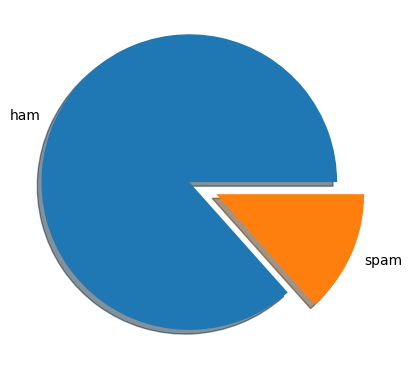

In [44]:
# Seeing the distribution of classes
# Will help us to identify which types

len_ham = len(data["label"][data.label == "ham"])
len_spam = len(data["label"][data.label == "spam"])

arr = np.array([len_ham, len_spam])
labels = ['ham', 'spam']

print("Total Number of Ham Cases - ", len_ham)
print("Toal Number of Spam Cases - ", len_spam)

plt.pie(arr, labels = labels, explode = [0.2, 0.0], shadow = True)
plt.show()

In [45]:
def text_preprocess(x):
    x = str(x).lower() #converting all text to lowercase
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    return x

data["Preprocessed Text"] = data["messages"].apply(lambda x : text_preprocess(x)) #making a new column

# Using NLTK - Stemming & Lemmitization
# Mostly used in text data

In [46]:
data.head()

,label,messages,Preprocessed Text
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar then Joking wif u oni,ok lar then joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar..."


In [47]:
data["label"] = data.label.map({'ham' : 0, 'spam' : 1})

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['Preprocessed Text'],
                                                    data['label'],
                                                    random_state = 1)

print('Number of Rows in the Total set - {}'.format(data.shape[0]), '\n')
print('Number of Rows in the Training set - {}'.format(X_train.shape[0]))
print('Number of Rows in the Test set - {}'.format(X_test.shape[0]))

Number of Rows in the Total set - 5572 

Number of Rows in the Training set - 4179
Number of Rows in the Test set - 1393


In [49]:
X_train

710     height of confidence: all the aeronautics prof...
3740                                        2/2 146tf150p
2711    wen ur lovable bcums angry wid u, dnt take it ...
3155                    long time. you remember me today.
3748    dear voucher holder 2 claim your 1st class air...
                              ...                        
905     hey what is up charles sorry about the late re...
5192    oh oh... den muz change plan liao... go back h...
3980    huh i cant thk of more oredi how many pages do...
235     i have printed it oh. so  &lt;#&gt;  come upst...
5157                              k k:) sms chat with me.
Name: Preprocessed Text, Length: 4179, dtype: object

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

#Instantiating the CountVectorizer method
count_vector = CountVectorizer()

#Fitting the data & returning matrix
training_data = count_vector.fit_transform(X_train)

# Transforming testing data & returning matrix.
testing_data = count_vector.transform(X_test)

In [51]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [52]:
predictions = naive_bayes.predict(testing_data)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score - ', format(accuracy_score(y_test, predictions)))
print('Precision score - ', format(precision_score(y_test, predictions)))
print('Recall score - ', format(recall_score(y_test, predictions)))
print('F1 score - ', format(f1_score(y_test, predictions)))

Accuracy score -  0.9849246231155779
Precision score -  0.9542857142857143
Recall score -  0.9277777777777778
F1 score -  0.9408450704225352


In [54]:
txt = pd.Series("This is the 2nd time we have tried 2 contact u...")
test = count_vector.transform(txt)

In [55]:
naive_bayes.predict(test)

array([0], dtype=int64)